# The Single Layer Perceptron (SLP) via Pandas&Numpy
**Intuition Understanding**:

The signle Layer Perceptron is a process to predict a value/label by repeatedly adjusting weights that can minimize the difference between the predicted output and the correct output.

SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target: 1 or 0.

**The core idea of the single layer perceptron algorithm is**:

*Forward Propagation*

- convert raw data into a vector $X$
- calculate a predicted value $y'$ by a function $f(w_0, b_0)$ (normally called activation function) with initial parameters $w_0$ and $b_0$

*Backward Propagation*

- compare the predicted $y'$ to the actual $y$, and get the difference of $y'$ and $y$
- iteratively update $w$ and $b$ by functions with a parameter $\alpha$ (normally called learning rate)
- note: ways/functions of upating $w$ and $b$ are different and could be customized.

<img src="pictures/Picture1.png" width="500" height="250">

For example, we want to adjust $w$ by $w_i^{new}=w_i^{old} + \alpha(y-y')x_i$, and adjust $b$ by $b^{new}=b^{old} + \alpha(y-y')$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Data 

In [2]:
X, Y = datasets.make_blobs(n_samples=1500, n_features=2, centers=2, cluster_std=1.05, random_state=2)
# show data
XY = np.concatenate((X, np.reshape(Y, (len(Y), 1))), axis=1)
data = pd.DataFrame(XY, columns=['x1','x2', 'y'])
data.head()

,x1,x2,y
0,-1.674265,-10.450768,0.0
1,0.988035,-3.195449,1.0
2,1.612114,-1.948690,1.0
3,1.083287,-3.411369,1.0
4,2.814011,-0.542952,1.0


Text(0.5, 1.0, ' My Dataset')

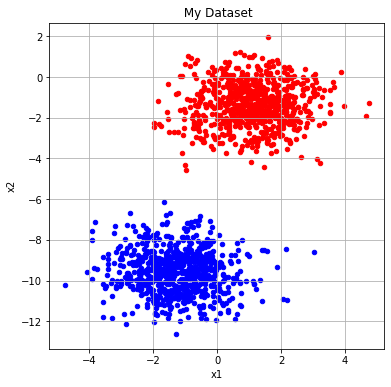

In [3]:
# visualize
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title(' My Dataset')

# Single Layer Perceptron (SLP)

In [4]:
class SingleLayerPerceptron:
    def __init__(self, initial_W, initial_b, learning_rate, max_iters):
        self.W = initial_W
        self.b = initial_b
        self.iters = max_iters
        self.lr = learning_rate
    
    def fit(self, X, Y):
        # training process record
        W = []
        b = []
        accuracy = []
        # training process to get the optimal parameters
        n_samples, n_features = X.shape
        for _ in range(self.iters):
            error = []
            W.append(self.W)
            b.append(self.b)
            for idx, x_i in enumerate(X):
                neuron = sum(x_i*self.W)+self.b
                y_predicted = self.activation(neuron)
                # update parameters
                self.W = self.W + self.lr*x_i*(Y[idx]-y_predicted)
                self.b = self.b + self.lr*(Y[idx]-y_predicted)
                #
                if Y[idx] == y_predicted:
                    error.append(1)
            accuracy.append(sum(error)/len(X))
        return W, b, accuracy
                
                
    def activation(self, neuron):
        if neuron > 0:
            return 1
        else:
            return 0
            
    def predict(self, X_df):
        y_predicted = []
        for idx, x_i in enumerate(X):
            neuron = sum(x_i*self.W)+self.b
            y_predicted.append(self.activation(neuron))         
        return np.array(y_predicted)

### Training model

In [5]:
# desigin model
SLP = SingleLayerPerceptron(initial_W=[0,0], initial_b=0.01, learning_rate=0.1, max_iters=1000)
# training model
data_train, data_test = train_test_split(data, test_size=0.2, random_state=123)
W, b, accuracy = SLP.fit(data_train.iloc[:,0:-1].values, data_train.iloc[:,-1].values)

Text(0.5, 1.0, 'Update process of parameters: w1, w2, b')

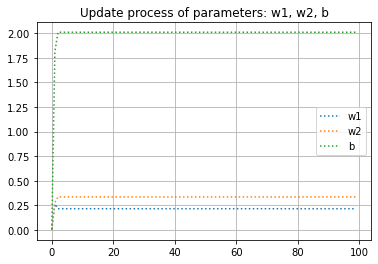

In [6]:
# visualize the parameter updating process 
W1 = []
W2 = []
B = []
for i in range(100):
    W1.append(W[i][0])
    W2.append(W[i][1])
    B.append(b[i])
    
plt.plot(W1, linestyle = 'dotted', label='w1')
plt.plot(W2, linestyle = 'dotted', label='w2' )
plt.plot(B, linestyle = 'dotted', label='b')
plt.legend()
plt.grid()
plt.title('Update process of parameters: w1, w2, b')

Text(0.5, 1.0, 'Accuracy')

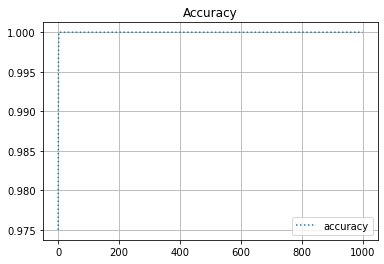

In [7]:
# visualize the accuracy during the training process
plt.plot(accuracy, linestyle = 'dotted', label='accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

### Testing model

In [8]:
def accuracy(y_true, y_pred):
    cnt = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            cnt += 1
    return cnt/len(y_true)

predictions = SLP.predict(data_test.iloc[:,0:-1].values)
print("Perceptron classification accuracy", accuracy(data_test.iloc[:,-1].values, predictions))

Perceptron classification accuracy 0.5066666666666667
